#Задание

In [38]:
import graphviz
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [61]:
df = pd.read_csv('diabetes.csv')
df_train = df[0:600]
df_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Число строк в получившейся выборке относящихся к классу 0 (пациент не болен диабетом).**

In [40]:
np.count_nonzero(df_train.Outcome == 0)

392

In [80]:
X = df_train[df_train.columns[0:8]]
y = df_train.Outcome

Разделение выборки

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = False)

Обучение модели

In [114]:
model = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes = 5, min_samples_leaf = 5, random_state = 2020).fit(X_train, y_train)

**Получившееся дерево решений**

In [115]:
columns = list(X_train.columns)
export_graphviz(model, out_file='tree.dot', 
                feature_names=columns,
                class_names=['0', '1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True, label='all')

with open('tree.dot') as f:
    dot_graph = f.read()

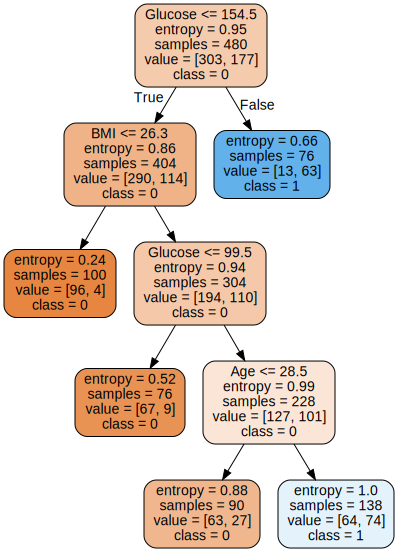

In [116]:
graphviz.Source(dot_graph)

**Глубина дерева**

In [117]:
model.get_depth()

4

**Предиктор, по которому выполнено разделение на последнем уровне дерева принятия решений**  
Age

**Pначение разделения для указанного предиктора с точностью до сотых**  
28.5

**Доля правильных ответов**

In [118]:
round(model.score(X_test, y_test), 2)

0.79

**Среднее значение метрики F1**

In [120]:
round(f1_score(y_test, model.predict(X_test), average='macro'), 2)

0.75

**Предсказание для пациентов 746, 725, 719, 721 (указаны номера строк, нумерация с нуля) из начального набора данных**

In [166]:
x_746 = df.iloc[[746], 0:8]
x_725 = df.iloc[[725], 0:8]
x_719 = df.iloc[[719], 0:8]
x_721 = df.iloc[[721], 0:8]

In [161]:
model.predict(x_746)

array([0])

In [163]:
model.predict(x_725)

array([1])

In [165]:
model.predict(x_719)

array([0])

In [167]:
model.predict(x_721)

array([0])